# Visualizations of the grades for cs 140

## These first few blocks are just getting the libraries and cleaning the data.

In [147]:
library(ggplot2)
library(scales)
library(dplyr)
library(reshape)
library(plotly)
library(ggthemes)
data <- read.delim("~/Documents/csc140/grades/withHW8Q8.csv", row.names=1, comment.char="#")

quizCols = 3:9
hwCols = 1:2
totalCol = 10

In [148]:
onlyQuizzes <- data[,quizCols]
removeMin <- function(row, k){
  removeThese = NULL
  for(i in 1:k){
    n = which.min(row)
    removeThese[i] = n
    row[n] = 1000
  }
  removeThese
}

for(i in 1:nrow(onlyQuizzes)){
  onlyQuizzes[i,removeMin(onlyQuizzes[i,],2)] = NA
}
data[,quizCols] = onlyQuizzes

#remove raw percentage
data = data [,1:9]
#data

In [149]:
weightedPercent <- function(row){
    (sum(row[hwCols],na.rm=TRUE)/23)*.249250 + (sum(row[quizCols],na.rm=TRUE)/50)*.750750
}

data$percent = apply(data,1,weightedPercent)
data = data[order(-data$percent),]

# Here is the data with lowest two quiz scores removed.

In [150]:
data

,H3,H8,Q1,Q2,Q3,Q4,Q5,Q7,Q8,percent
799,17,6,10,10,10,9,NA,NA,10,0.984985
1091,13,6,10,9.5,10,NA,NA,9,10,0.9341297
293,18,6,8,10,NA,6.5,8,9,NA,0.8832095
8473,15,6,8,7,8,NA,NA,10,6.5,0.8206686
5288,14,3,9,8,8,7.5,NA,8,NA,0.7923358
1123,15,3,9,7.5,8.5,3.5,NA,8,NA,0.7431127
1775,5,3,9,9.5,9,NA,NA,8,8,0.7398482
7472,13,6,9,6.5,NA,7,7,6,NA,0.7389347
3539,7,3,NA,6,6,7.5,8,6,NA,0.6113721
3527,7,0,5,7.5,10,NA,NA,7.5,5,0.6013837


In [151]:
#function to get stats for each column and put them into a data frame
stats = function(i){
    data.frame(mean =   mean(data[,i],na.rm=TRUE),
                        median = median(data[,i],na.rm=TRUE),
                        sd = sd(data[,i],na.rm=TRUE),
                        numNA = sum(is.na(data[,i])),
                        min = min(data[,i],na.rm=TRUE),
                        max = max(data[,i],na.rm=TRUE))
}

# Here are the visualizations.
#### these first 10 or so bar graphs are "histograms" of distribution of the score for each assignment
#### the x-axis is the score
#### and the y-axis is the number of people that got that score

ERROR: Error in file(con, "rb"): cannot open the connection


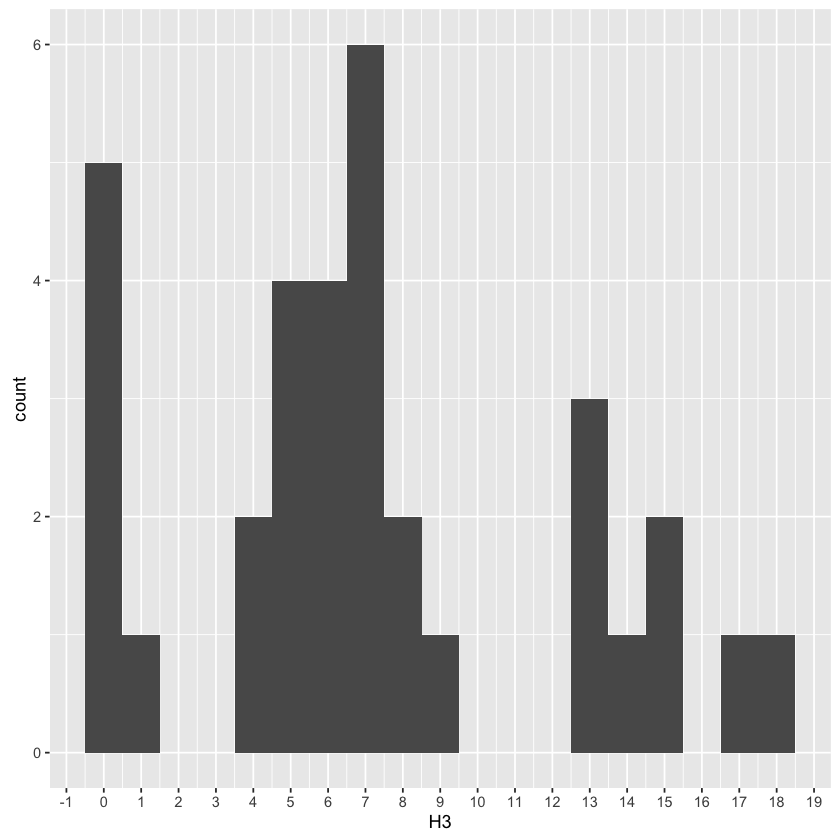

In [152]:
plot = ggplot(data,aes(x=H3)) + 
    geom_histogram(binwidth=1) + 
    scale_x_continuous(breaks=pretty_breaks(n=20))
H3Stats = stats(1)
#embed_notebook(ggplotly(plot))
plot

Warning message:
: Removed 4 rows containing non-finite values (stat_bin).

ERROR: Error in file(con, "rb"): cannot open the connection


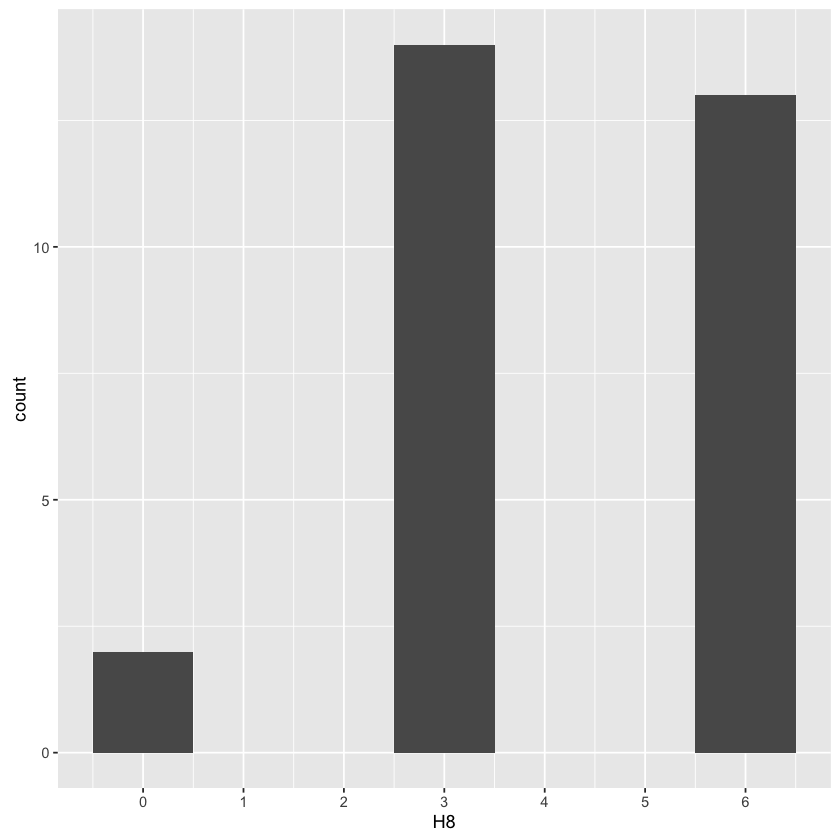

In [153]:
plot = ggplot(data,aes(x=H8)) + 
    geom_histogram(binwidth=1) + 
    scale_x_continuous(breaks=pretty_breaks(n=6))
H8Stats = stats(2)
#embed_notebook(ggplotly(plot))
plot

Warning message:
: Removed 11 rows containing non-finite values (stat_bin).

ERROR: Error in file(con, "rb"): cannot open the connection


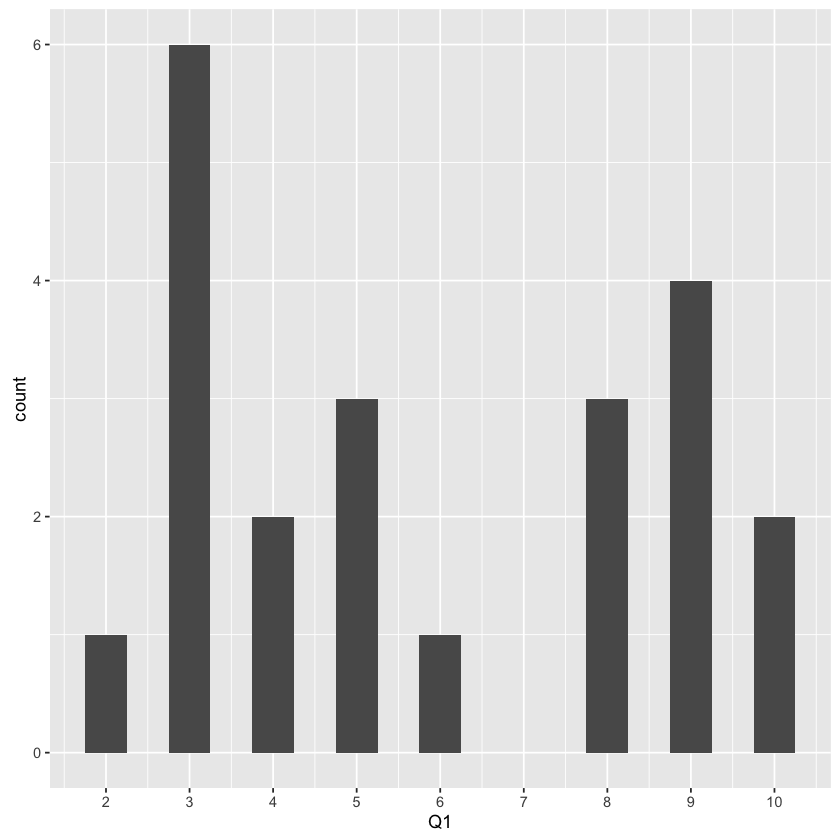

In [154]:
plot = ggplot(data,aes(x=Q1)) + 
    geom_histogram(binwidth=.5) + 
    scale_x_continuous(breaks=pretty_breaks(n=10))
Q1Stats = stats(3)
#embed_notebook(ggplotly(plot))
plot

Warning message:
: Removed 2 rows containing non-finite values (stat_bin).

ERROR: Error in file(con, "rb"): cannot open the connection


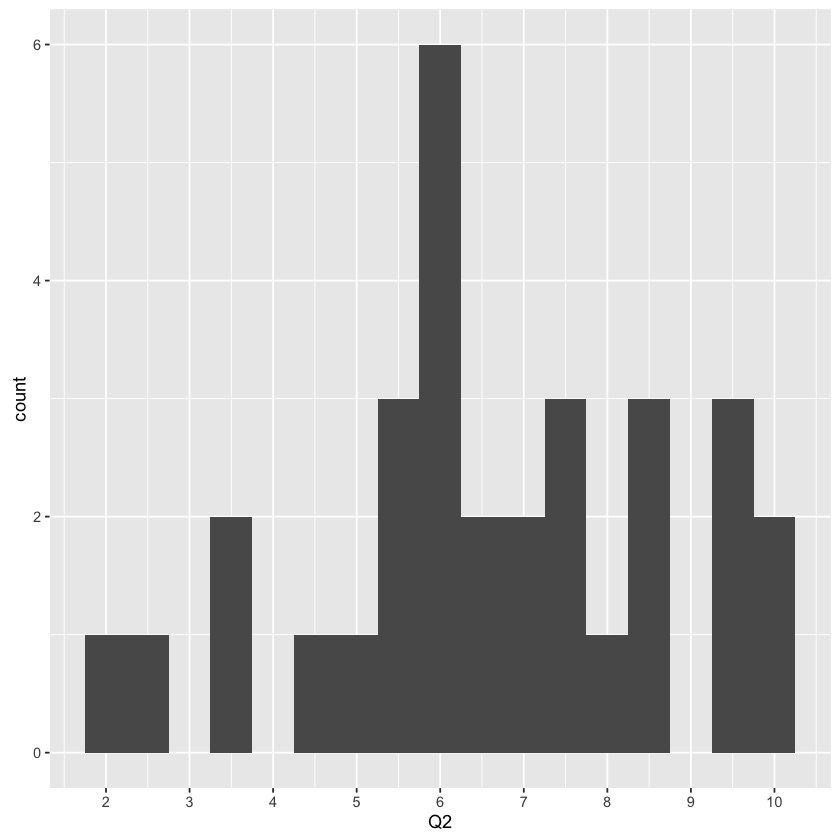

In [155]:
plot = ggplot(data,aes(x=Q2)) + 
    geom_histogram(binwidth=.5) + 
    scale_x_continuous(breaks=pretty_breaks(n=10))
Q2Stats = stats(4)
#embed_notebook(ggplotly(plot))
plot

Warning message:
: Removed 3 rows containing non-finite values (stat_bin).

ERROR: Error in file(con, "rb"): cannot open the connection


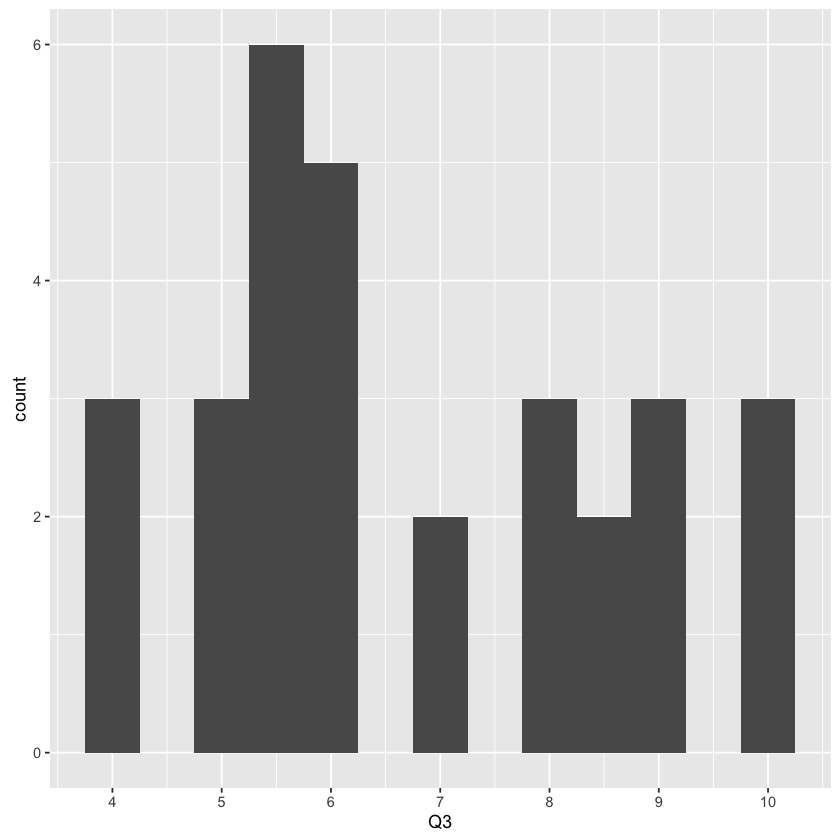

In [156]:
plot = ggplot(data,aes(x=Q3)) + 
    geom_histogram(binwidth=.5) + 
    scale_x_continuous(breaks=pretty_breaks(n=10))
Q3Stats = stats(5)
#embed_notebook(ggplotly(plot))
plot

Warning message:
: Removed 12 rows containing non-finite values (stat_bin).

ERROR: Error in file(con, "rb"): cannot open the connection


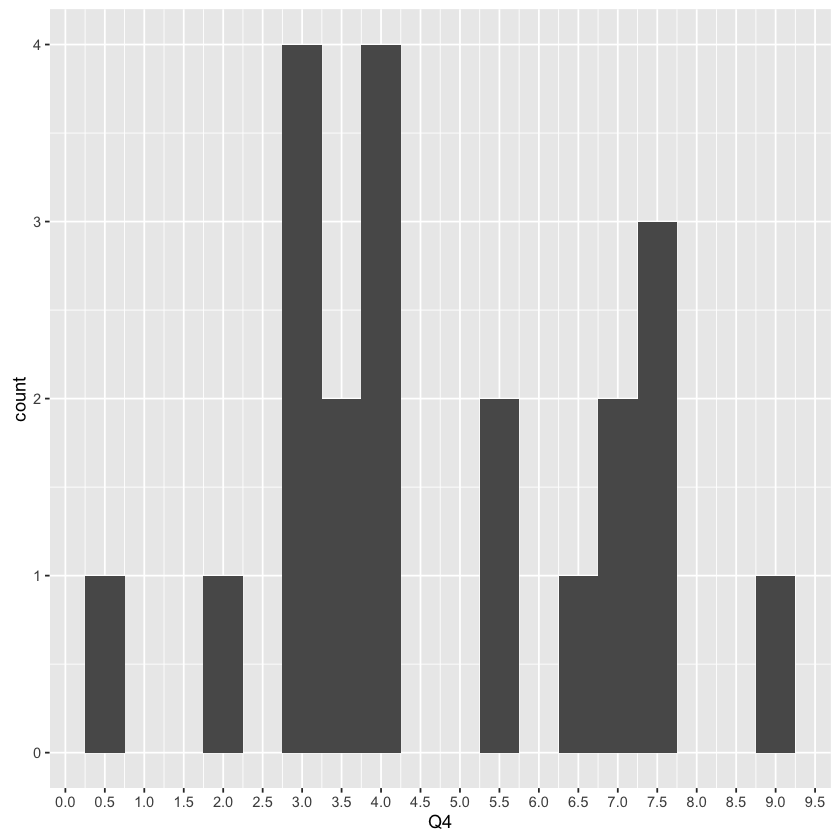

In [157]:
plot = ggplot(data,aes(x=Q4)) + 
    geom_histogram(binwidth=.5) + 
    scale_x_continuous(breaks=pretty_breaks(n=20))
Q4Stats = stats(6)
#embed_notebook(ggplotly(plot))
plot

Warning message:
: Removed 12 rows containing non-finite values (stat_bin).

ERROR: Error in file(con, "rb"): cannot open the connection


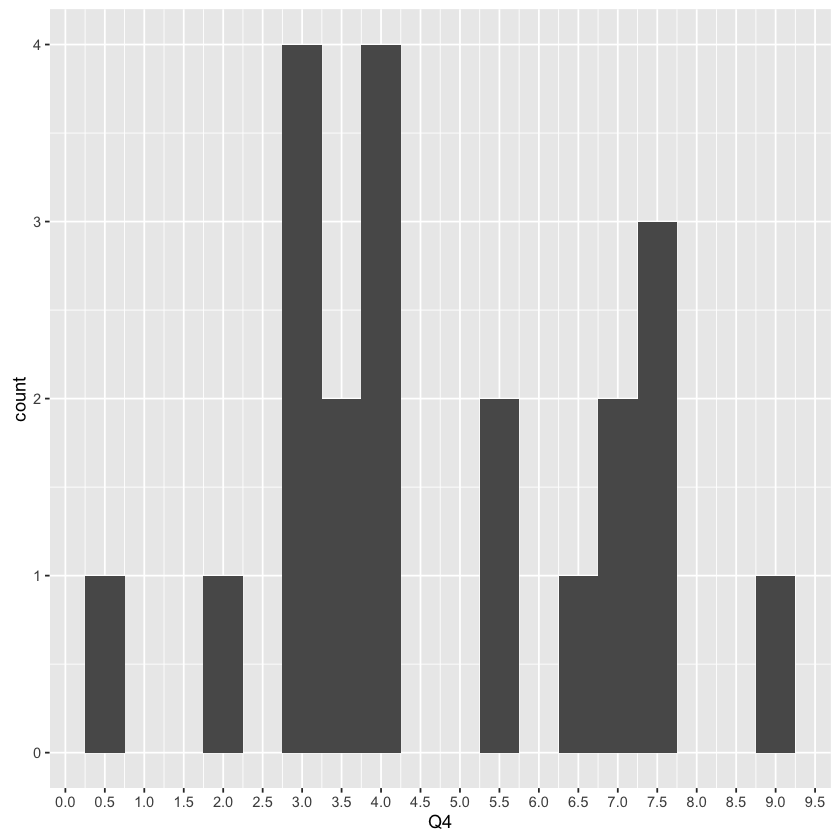

In [158]:
pllot = ggplot(data,aes(x=Q5)) + 
    geom_histogram(binwidth=.5) + 
    scale_x_continuous(breaks=pretty_breaks(n=20))
Q5Stats = stats(7)
#embed_notebook(ggplotly(plot))
plot

Warning message:
: Removed 9 rows containing non-finite values (stat_bin).

ERROR: Error in file(con, "rb"): cannot open the connection


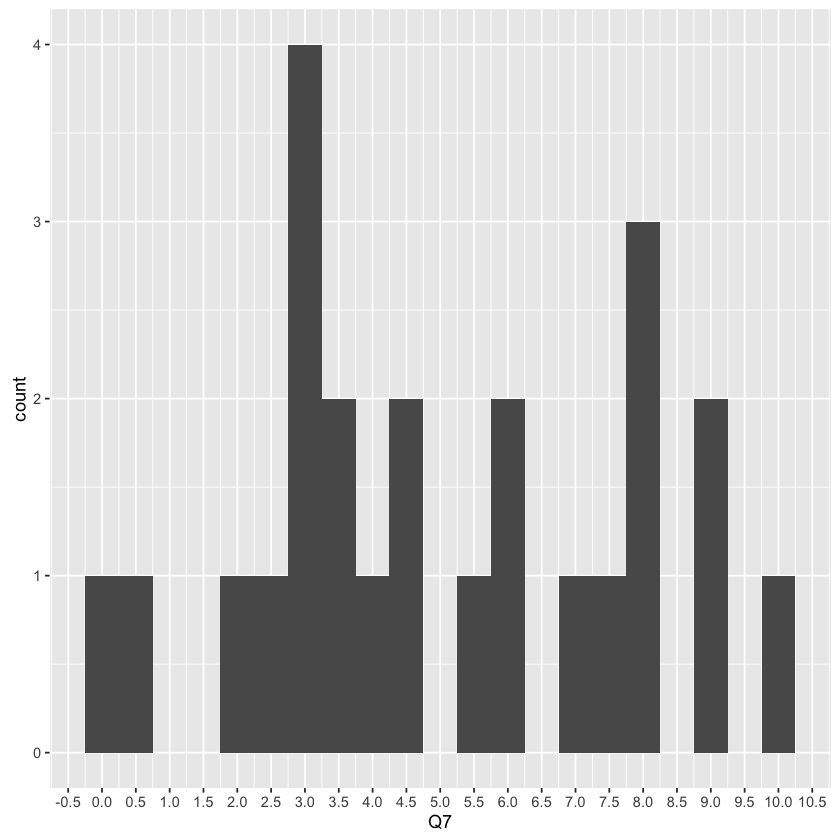

In [159]:
plot = ggplot(data,aes(x=Q7)) + 
    geom_histogram(binwidth=.5) + 
    scale_x_continuous(breaks=pretty_breaks(n=20))
Q7Stats = stats(8)
#embed_notebook(ggplotly(plot))
plot

Warning message:
: Removed 11 rows containing non-finite values (stat_bin).

ERROR: Error in file(con, "rb"): cannot open the connection


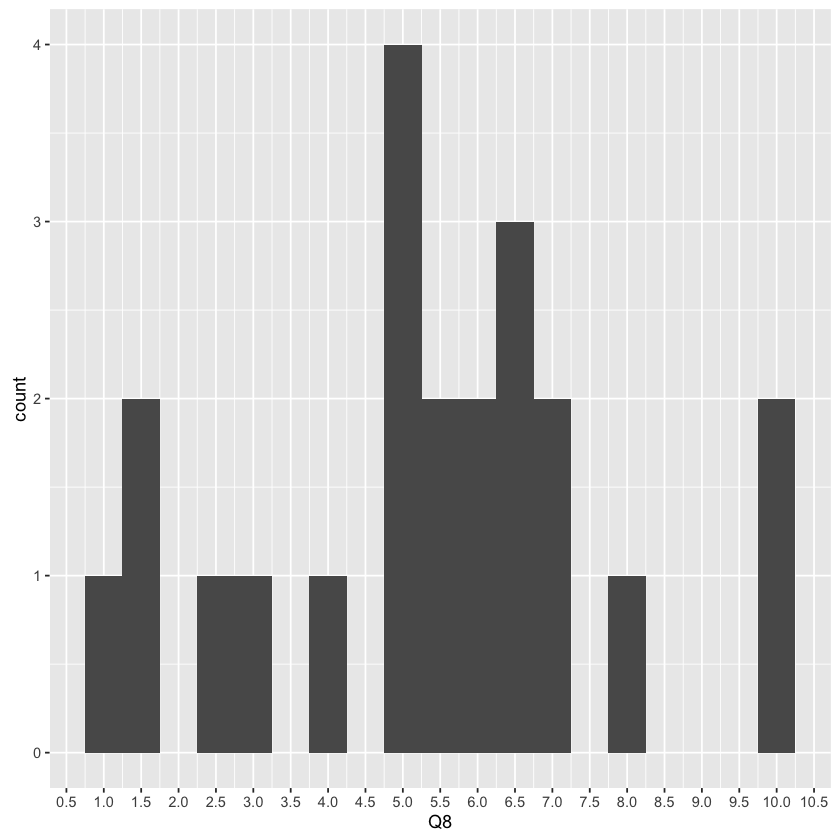

In [160]:
plot = ggplot(data,aes(x=Q8)) + 
    geom_histogram(binwidth=.5) + 
    scale_x_continuous(breaks=pretty_breaks(n=20))
Q8Stats = stats(9)
#embed_notebook(ggplotly(plot))
plot

ERROR: Error in file(con, "rb"): cannot open the connection


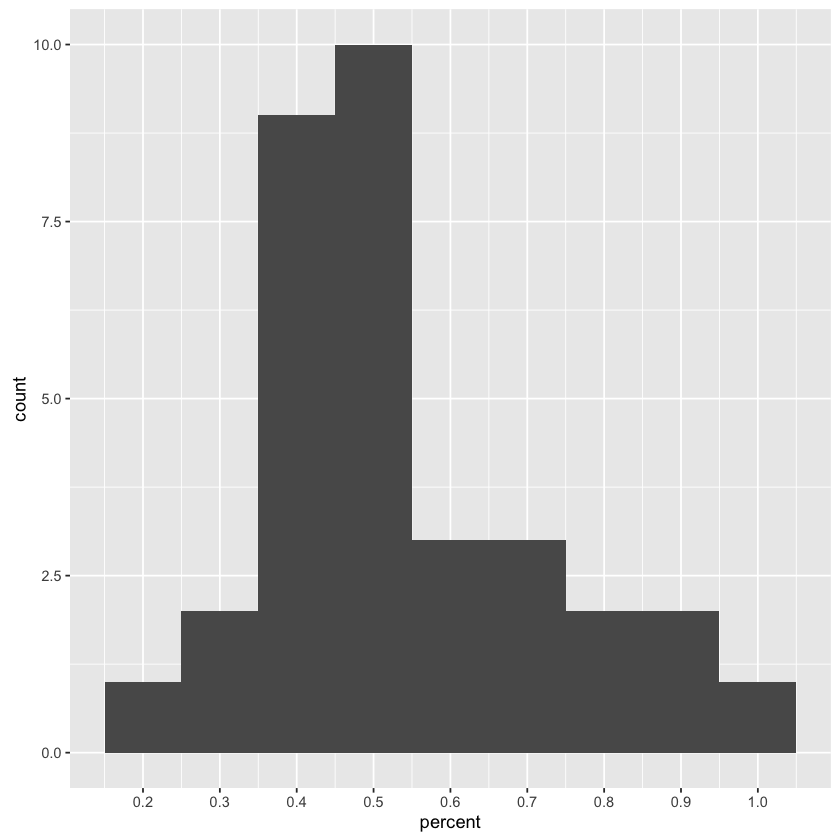

In [161]:
plot = ggplot(data,aes(x=percent)) + 
    geom_histogram(binwidth=.1) + 
    scale_x_continuous(breaks=pretty_breaks(n=10))

#embed_notebook(ggplotly(plot))
plot

In [162]:
#take all the stats for each assignment and combine them into 1 data frame
allStats = Q1Stats
allStats = rbind(allStats,Q2Stats)
allStats = rbind(allStats,Q3Stats)
allStats = rbind(allStats,Q4Stats)
allStats = rbind(allStats,Q5Stats)
allStats = rbind(allStats,Q7Stats)
allStats = rbind(allStats,Q8Stats)
quizStats = allStats
allStats = rbind(allStats,H3Stats)
allStats = rbind(allStats,H8Stats)

allStats = rbind(allStats,stats(10))
qNames = c("Q1","Q2","Q3","Q4","Q5","Q7","Q8")
row.names(quizStats) = qNames
row.names(allStats) = c(qNames, "H3", "H8","Result")

# The mean, median, standard deviation, number of people that got that score dropped or didn't turn anything in, the lowest score, and the highest score.


In [163]:
allStats

,mean,median,sd,numNA,min,max
Q1,5.863636,5,2.765355,11,2,10
Q2,6.612903,6.5,2.112304,2,2,10
Q3,6.733333,6,1.874205,3,4,10
Q4,4.785714,4,2.216819,12,0.5,9
Q5,4.233333,4,2.541559,18,0.5,8
Q7,5.041667,4.5,2.789408,9,0,10
Q8,5.363636,5.5,2.440637,11,1,10
H3,7.212121,7,5.091399,0,0,18
H8,4.137931,3,1.865555,4,0,6
Result,0.5448096,0.5154717,0.1908279,0,0.1634678,0.984985


### A lot more re arranging of the data. This is messy and poorly  done. I do not recommend trying to understand this.

In [164]:
noTotal = allStats[1:9,]
meanSD = data.frame(category = c("q1","q2","q3","q4","q5","q7","q8","h3","h8"),
                    oneSDAbove = noTotal$mean + noTotal$sd,
                    mean = noTotal$mean, 
                    oneSDBelow = noTotal$mean - noTotal$sd)

In [165]:
melted = melt(meanSD,id.vars="category")
melted$variable = as.character(melted$variable)
melted$category = as.character(melted$category)
melted = rbind(data.frame(category = c("q1"),variable = c("result"),value = filter(data, !is.na(data$Q1))$Q1),melted)
melted = rbind(data.frame(category = c("q2"),variable = c("result"),value = filter(data, !is.na(data$Q2))$Q2),melted)
melted = rbind(data.frame(category = c("q3"),variable = c("result"),value = filter(data, !is.na(data$Q3))$Q3),melted)
melted = rbind(data.frame(category = c("q4"),variable = c("result"),value = filter(data, !is.na(data$Q4))$Q4),melted)
melted = rbind(data.frame(category = c("q5"),variable = c("result"),value = filter(data, !is.na(data$Q5))$Q5),melted)
melted = rbind(data.frame(category = c("q7"),variable = c("result"),value = filter(data, !is.na(data$Q7))$Q7),melted)
melted = rbind(data.frame(category = c("q8"),variable = c("result"),value = filter(data, !is.na(data$Q8))$Q8),melted)
melted = rbind(data.frame(category = c("h3"),variable = c("result"),value = filter(data, !is.na(data$H3))$H3),melted)
melted = rbind(data.frame(category = c("h8"),variable = c("result"),value = filter(data, !is.na(data$H8))$H8),melted)
melted$variable = as.factor(melted$variable)
melted$category = as.factor(melted$category)

In [166]:
# A different view of every grade for each assignment.
#### x axis is the assignment
#### y axis is everybodies score
#### shows the mean grade and one standard deviation above and below

ERROR: Error in file(con, "rb"): cannot open the connection


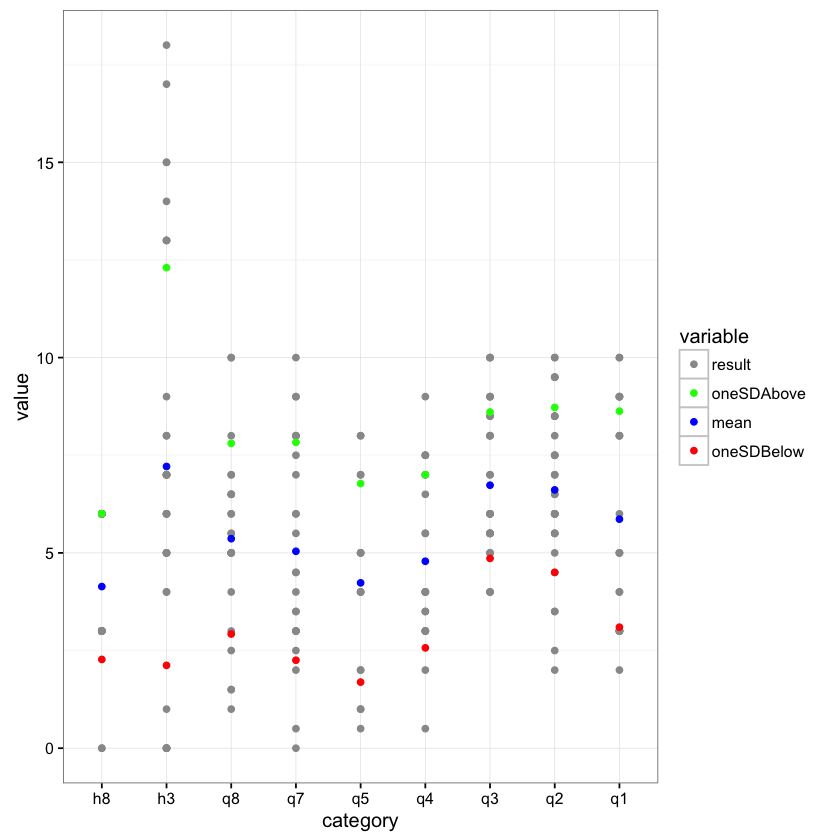

In [167]:
cbbPalette <- c("#999999", "#00FF00", "#0000FF", "#FF0000", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

p = ggplot(melted, aes(x=category,y=value,color=variable)) + 
    geom_point() + 
    scale_colour_manual(values=cbbPalette) +
    theme_bw()
#embed_notebook(ggplotly(p))
p

In [168]:
onlyTotal = allStats[10,]
onlyTot = data.frame(category = c("Total Score"),
                    oneSDAbove = onlyTotal$mean + onlyTotal$sd,
                    mean = onlyTotal$mean, 
                    oneSDBelow = onlyTotal$mean - onlyTotal$sd)

melted = melt(onlyTot,id.vars="category")
melted$variable = as.character(melted$variable)
melted$category = as.character(melted$category)
melted = rbind(data.frame(category = c("Total Score"),variable = c("result"),value = filter(data, !is.na(data$percent))$percent),melted)
melted$variable = as.factor(melted$variable)
melted$category = as.factor(melted$category)

ERROR: Error in file(con, "rb"): cannot open the connection


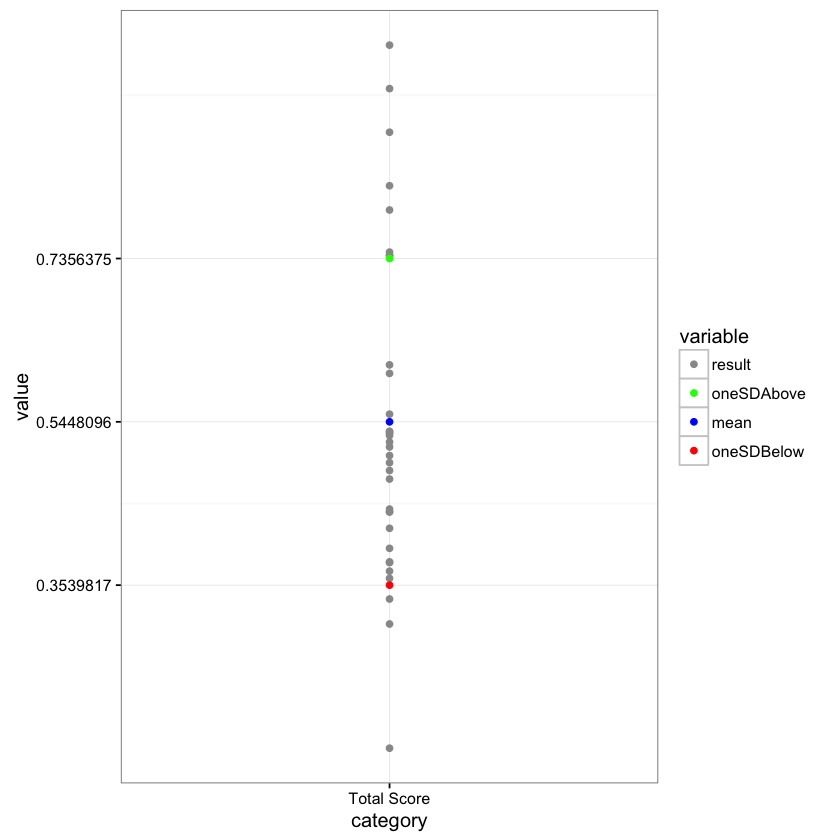

In [169]:
onlyTotal = allStats[10,]
oneSDUp = onlyTotal$mean + onlyTotal$sd
oneSDDown = onlyTotal$mean - onlyTotal$sd
totalMean = onlyTotal$mean
plot = ggplot(melted, aes(category, value,color=variable)) +
    geom_point() +
    scale_y_continuous(breaks=c(oneSDUp, oneSDDown, totalMean)) +
    scale_colour_manual(values=cbbPalette) +
    theme_bw()
#embed_notebook(ggplotly(plot))
plot

In [ ]:
## Here are the grades you need on the final to get an A, B, and C
#### Theres still a quiz and homework that haven't been returned that aren't factored in.

In [185]:
#Target Grade = Exam Weight * Exam Score + (1 – Exam Weight) * Current Grade
#(Target Grade - (1-Exam Weight) * Current Grade) / Exam Weight = Exam Score

data$forA <- apply(data,1,function(x) (oneSDUp-x[10]*(1-.3333))/.3333)
data$forB <- apply(data,1,function(x) (totalMean-x[10]*(1-.3333))/.3333)
data$forC <- apply(data,1,function(x) (oneSDDown-x[10]*(1-.3333))/.3333)
data[,10:13]

,percent,forA,forB,forC
799,0.984985,0.2368675,-0.3356734,-0.9082143
1091,0.9341297,0.3385935,-0.2339475,-0.8064884
293,0.8832095,0.4404492,-0.1320918,-0.7046327
8473,0.8206686,0.5655497,-0.006991264,-0.5795322
5288,0.7923358,0.6222238,0.04968289,-0.522858
1123,0.7431127,0.7206847,0.1481437,-0.4243972
1775,0.7398482,0.7272148,0.1546739,-0.4178671
7472,0.7389347,0.729042,0.1565011,-0.4160399
3539,0.6113721,0.9842055,0.4116646,-0.1608764
3527,0.6013837,1.004185,0.4316443,-0.1408966
